# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [1]:
#Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

from sklearn.utils import resample

In [2]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

In [3]:
fraud.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [4]:
fraud.shape

(1000000, 8)

fraud
0.0    0.912597
1.0    0.087403
Name: proportion, dtype: float64 



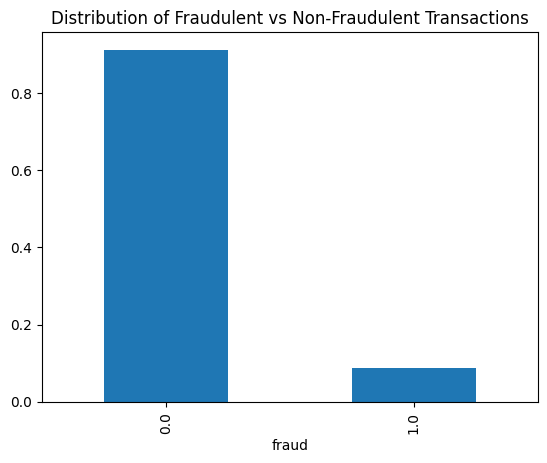

As we can see from the distribution and the value counts, the dataset is imbalanced since the proportion of fraudulent transactions is significantly lower than non-fraudulent ones.


In [5]:
# 1. Is the dataset balanced or imbalanced?

is_fraud = fraud["fraud"].value_counts(normalize=True)
print(is_fraud, "\n")
is_fraud.plot(kind="bar")
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.show()

print("As we can see from the distribution and the value counts, the dataset is imbalanced since the proportion of fraudulent transactions is significantly lower than non-fraudulent ones.")

In [6]:
# 2. Train LogisticRegression

features = fraud.drop(columns = ["fraud"])
target = fraud["fraud"]

X_train, X_test, y_train, y_test = train_test_split(features, target)

In [7]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
log_reg = LogisticRegression()

In [9]:
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [10]:
# 3. Model Evaluation
log_reg.score(X_test_scaled, y_test)

0.95904

In [11]:
print("""We evaluated our Logistic Regression model while taking into account the strong class imbalance.
In this context, accuracy is not a relevant metric.
Therefore, we used Recall, Precision, the F1-score for the fraud class, as well as ROC-AUC.\n""")

pred = log_reg.predict(X_test_scaled)
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]  # ROC-AUC

# Confusion Matrix
print("Confusion Matrix :")
print(confusion_matrix(y_pred = pred, y_true = y_test))

# Classification Report
print("\nClassification Report :")
print(classification_report(y_pred = pred, y_true = y_test))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_proba)
print("\nROC-AUC :", roc_auc)

# Interpretation
print("""\nThe model shows a high precision but a low recall for the fraud class, indicating that while it is good at identifying non-fraudulent transactions, it misses a significant number of fraudulent ones. 
The ROC-AUC score suggests that the model has a moderate ability to distinguish between the two classes overall.""")
print("""\nOverall, while the model performs well in terms of precision, its low recall for the fraud class.
This indicates that it may not be sufficiently effective for identifying fraudulent transactions in this imbalanced dataset.""")

We evaluated our Logistic Regression model while taking into account the strong class imbalance.
In this context, accuracy is not a relevant metric.
Therefore, we used Recall, Precision, the F1-score for the fraud class, as well as ROC-AUC.

Confusion Matrix :
[[226630   1585]
 [  8655  13130]]

Classification Report :
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    228215
         1.0       0.89      0.60      0.72     21785

    accuracy                           0.96    250000
   macro avg       0.93      0.80      0.85    250000
weighted avg       0.96      0.96      0.96    250000


ROC-AUC : 0.9654112383132746

The model shows a high precision but a low recall for the fraud class, indicating that while it is good at identifying non-fraudulent transactions, it misses a significant number of fraudulent ones. 
The ROC-AUC score suggests that the model has a moderate ability to distinguish between the two classes overall.

Overall

In [12]:
# 4. Oversampling the minority class
fraud_data = pd.DataFrame(X_train_scaled, columns = X_train.columns)

In [13]:
fraud_data["fraud"] = y_train.values

In [14]:
fraudulent = fraud_data[fraud_data["fraud"] == 1]
non_fraudulent = fraud_data[fraud_data["fraud"] == 0]

In [15]:
fraudulent_over = resample(fraudulent,
                                  replace=True,
                                  n_samples=len(non_fraudulent),
                                  random_state=0)

In [16]:
train_over = pd.concat([fraudulent_over, non_fraudulent])
train_over

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
499082,0.214793,-0.187866,1.357409,0.366579,-0.734034,-0.334611,0.732342,1.0
488287,-0.269490,3.973735,-0.145809,0.366579,-0.734034,-0.334611,0.732342,1.0
525170,-0.321053,-0.106833,2.493450,0.366579,-0.734034,-0.334611,0.732342,1.0
243991,0.260347,-0.185066,2.774724,0.366579,1.362335,-0.334611,0.732342,1.0
480793,-0.350318,-0.188365,0.867190,0.366579,-0.734034,-0.334611,0.732342,1.0
...,...,...,...,...,...,...,...,...
749993,-0.326299,-0.086640,0.190466,0.366579,-0.734034,-0.334611,0.732342,0.0
749994,-0.128795,-0.188482,1.368523,0.366579,-0.734034,2.988546,0.732342,0.0
749995,-0.320569,-0.151341,0.195440,0.366579,-0.734034,-0.334611,0.732342,0.0
749998,-0.166415,1.706420,-0.461210,0.366579,-0.734034,-0.334611,-1.365482,0.0


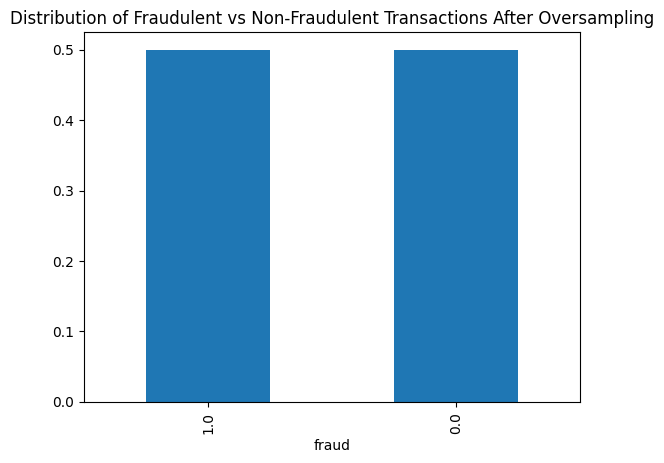

In [17]:
fraud_plt = train_over["fraud"].value_counts(normalize=True)
fraud_plt.plot(kind="bar")
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions After Oversampling')
plt.show()

In [18]:
X_train_over = train_over.drop(columns=["fraud"])
y_train_over = train_over["fraud"]

In [19]:
log_reg_over = LogisticRegression()
log_reg_over.fit(X_train_over, y_train_over)

LogisticRegression()

In [20]:
pred_over = log_reg_over.predict(X_test_scaled)
y_proba_over = log_reg_over.predict_proba(X_test_scaled)[:, 1] 
# Confusion Matrix
print("Confusion Matrix :")
print(confusion_matrix(y_pred = pred_over, y_true = y_test))

# Classification Report
print("\nClassification Report :")
print(classification_report(y_pred = pred_over, y_true = y_test))

# ROC-AUC
roc_auc_over = roc_auc_score(y_test, y_proba_over)
print("\nROC-AUC :", roc_auc_over)

Confusion Matrix :
[[212899  15316]
 [  1144  20641]]

Classification Report :
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228215
         1.0       0.57      0.95      0.71     21785

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000


ROC-AUC : 0.9787061573768632


/Users/snow/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/snow/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [21]:
# Interpretation
print("""\nAfter applying oversampling to balance the classes in the training data, the Logistic Regression model shows a significant improvement in recall for the fraud class, indicating that it is now better at identifying fraudulent transactions.
However, this comes at the cost of a decrease in precision, meaning that there are more false positives.
The ROC-AUC score has also improved, suggesting a better overall ability to distinguish between the two classes.""")
print("""\nOverall, oversampling has helped the model to better detect fraudulent transactions, which is crucial in this context, despite the trade-off with precision.""")


After applying oversampling to balance the classes in the training data, the Logistic Regression model shows a significant improvement in recall for the fraud class, indicating that it is now better at identifying fraudulent transactions.
However, this comes at the cost of a decrease in precision, meaning that there are more false positives.
The ROC-AUC score has also improved, suggesting a better overall ability to distinguish between the two classes.

Overall, oversampling has helped the model to better detect fraudulent transactions, which is crucial in this context, despite the trade-off with precision.


In [22]:
# 5. Undersampling
no_fraud_undersampled = resample(non_fraudulent,
                                  replace=False,
                                  n_samples=len(fraudulent),
                                  random_state=0)

no_fraud_undersampled


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
188656,-0.345201,-0.161133,-0.533757,0.366579,-0.734034,2.988546,0.732342,0.0
281231,-0.321365,0.077088,-0.335928,0.366579,-0.734034,-0.334611,-1.365482,0.0
262991,0.138636,-0.158396,-0.227836,0.366579,-0.734034,-0.334611,0.732342,0.0
285142,-0.205185,-0.126115,-0.574038,0.366579,-0.734034,-0.334611,0.732342,0.0
91511,0.400858,-0.118599,-0.261817,0.366579,-0.734034,-0.334611,0.732342,0.0
...,...,...,...,...,...,...,...,...
441502,0.637064,-0.137055,-0.197629,0.366579,1.362335,-0.334611,0.732342,0.0
481924,-0.105940,-0.164032,-0.285486,0.366579,-0.734034,-0.334611,0.732342,0.0
168409,-0.206602,-0.175966,-0.552778,0.366579,1.362335,-0.334611,0.732342,0.0
608923,-0.220560,-0.160806,-0.587078,0.366579,-0.734034,-0.334611,0.732342,0.0


In [23]:
train_under = pd.concat([no_fraud_undersampled, fraudulent])
train_under

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
188656,-0.345201,-0.161133,-0.533757,0.366579,-0.734034,2.988546,0.732342,0.0
281231,-0.321365,0.077088,-0.335928,0.366579,-0.734034,-0.334611,-1.365482,0.0
262991,0.138636,-0.158396,-0.227836,0.366579,-0.734034,-0.334611,0.732342,0.0
285142,-0.205185,-0.126115,-0.574038,0.366579,-0.734034,-0.334611,0.732342,0.0
91511,0.400858,-0.118599,-0.261817,0.366579,-0.734034,-0.334611,0.732342,0.0
...,...,...,...,...,...,...,...,...
749940,0.018988,31.654856,1.447756,0.366579,-0.734034,-0.334611,0.732342,1.0
749942,-0.379424,1.045649,4.435277,-2.727925,1.362335,-0.334611,0.732342,1.0
749971,2.357678,-0.187673,-0.496740,0.366579,-0.734034,-0.334611,0.732342,1.0
749996,6.152839,-0.065491,-0.510219,0.366579,-0.734034,-0.334611,0.732342,1.0


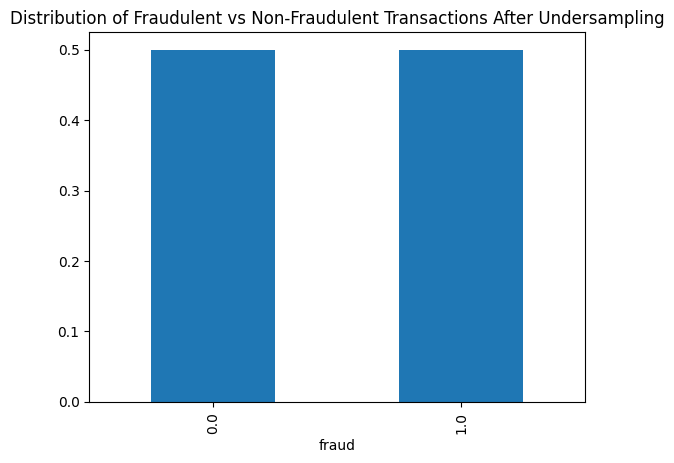

In [24]:
fraud_plt = train_under["fraud"].value_counts(normalize=True)
fraud_plt.plot(kind="bar")
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions After Undersampling')
plt.show()

In [25]:
X_train_under = train_under.drop(columns = ["fraud"])
y_train_under = train_under["fraud"]

In [26]:
log_reg_under = LogisticRegression()
log_reg_under.fit(X_train_under, y_train_under)

LogisticRegression()

In [27]:
pred_under = log_reg_under.predict(X_test_scaled)
y_proba_under = log_reg_under.predict_proba(X_test_scaled)[:, 1]

# Confusion Matrix
print("Confusion Matrix :")
print(confusion_matrix(y_pred = pred_under, y_true = y_test))

# Classification Report
print("\nClassification Report :")
print(classification_report(y_pred = pred_under, y_true = y_test))

# ROC-AUC
roc_auc_under = roc_auc_score(y_test, y_proba_under)
print("\nROC-AUC :", roc_auc_under)

Confusion Matrix :
[[212801  15414]
 [  1127  20658]]

Classification Report :
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228215
         1.0       0.57      0.95      0.71     21785

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000


ROC-AUC : 0.9787845375766587


/Users/snow/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/snow/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [28]:
# Interpretation
print("""\nAfter applying undersampling to balance the classes in the training data, the Logistic Regression model shows an improvement in recall for the fraud class, indicating better detection of fraudulent transactions.
However, similar to oversampling, this comes with a decrease in precision, leading to more false positives. The ROC-AUC score indicates a moderate ability to distinguish between the two classes.""")
print("""\nOverall, while undersampling has improved the model's ability to detect fraudulent transactions, it also highlights the trade-off between recall and precision in handling imbalanced datasets.""")


After applying undersampling to balance the classes in the training data, the Logistic Regression model shows an improvement in recall for the fraud class, indicating better detection of fraudulent transactions.
However, similar to oversampling, this comes with a decrease in precision, leading to more false positives. The ROC-AUC score indicates a moderate ability to distinguish between the two classes.

Overall, while undersampling has improved the model's ability to detect fraudulent transactions, it also highlights the trade-off between recall and precision in handling imbalanced datasets.


In [29]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 1,sampling_strategy=1.0)

In [30]:
X_train_sm,y_train_sm = sm.fit_resample(X_train_scaled,y_train)

/Users/snow/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [31]:
log_reg_sm = LogisticRegression(max_iter=1000)
log_reg_sm.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=1000)

In [32]:
pred_sm = log_reg_sm.predict(X_test_scaled)
y_proba_sm = log_reg_sm.predict_proba(X_test_scaled)[:, 1]

# Confusion Matrix
print("Confusion Matrix :")
print(confusion_matrix(y_pred = pred_sm, y_true = y_test))

# Classification Report
print("\nClassification Report :")
print(classification_report(y_pred = pred_sm, y_true = y_test))

# ROC-AUC
roc_auc_sm = roc_auc_score(y_test, y_proba_sm)
print("\nROC-AUC :", roc_auc_sm)

# Interpretation
print("""\nAfter applying SMOTE to balance the classes in the training data, the Logistic Regression model demonstrates a significant improvement in recall for the fraud class, indicating enhanced detection of fraudulent transactions.
However, this comes with a decrease in precision, leading to more false positives. The ROC-AUC score indicates a good ability to distinguish between the two classes.""")
print("""\nOverall, while SMOTE has improved the model's ability to detect fraudulent transactions, it also highlights the trade-off between recall and precision in handling imbalanced datasets.""")

Confusion Matrix :
[[212845  15370]
 [  1134  20651]]

Classification Report :
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228215
         1.0       0.57      0.95      0.71     21785

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000


ROC-AUC : 0.9787399300750179

After applying SMOTE to balance the classes in the training data, the Logistic Regression model demonstrates a significant improvement in recall for the fraud class, indicating enhanced detection of fraudulent transactions.
However, this comes with a decrease in precision, leading to more false positives. The ROC-AUC score indicates a good ability to distinguish between the two classes.

Overall, while SMOTE has improved the model's ability to detect fraudulent transactions, it also highlights the trade-off between recall and precision in handling imbalance